## Q1

Complete the code below showing the sequential posterior distributions created as each observation is actualized.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

## A1

1. **Likelihood**:

   $$p(x \mid \theta, n) = \text{Binomial}(n, \theta) = \binom{n}{x} \theta^x (1 - \theta)^{n - x}$$

2. **Prior**:

   $$
   p(\theta) =
   \begin{cases} 
   \frac{1}{101} & \text{for } \theta = \frac{i}{100}, \, i = 0, 1, \ldots, 100, \\
   0 & \text{otherwise}.
   \end{cases}
   $$

   This corresponds to a **discrete uniform prior**.

3. **Posterior**:

   Using Bayes' Theorem:

   $$p(\theta \mid x, n) = \frac{p(x \mid \theta, n) \cdot p(\theta)}{p(x)}$$

   Here, \( p(x) \) is the **normalizing constant** ensuring the posterior sums to 1.

   Since the prior is uniform:

   $$p(\theta \mid x, n) \propto \theta^x (1 - \theta)^{n - x}.$$

4. **Resulting Distribution**:

   The posterior follows a **Beta distribution**:

   $$p(\theta \mid x, n) \sim \text{Beta}(\alpha, \beta), \quad \alpha = x + 1, \, \beta = n - x + 1.$$

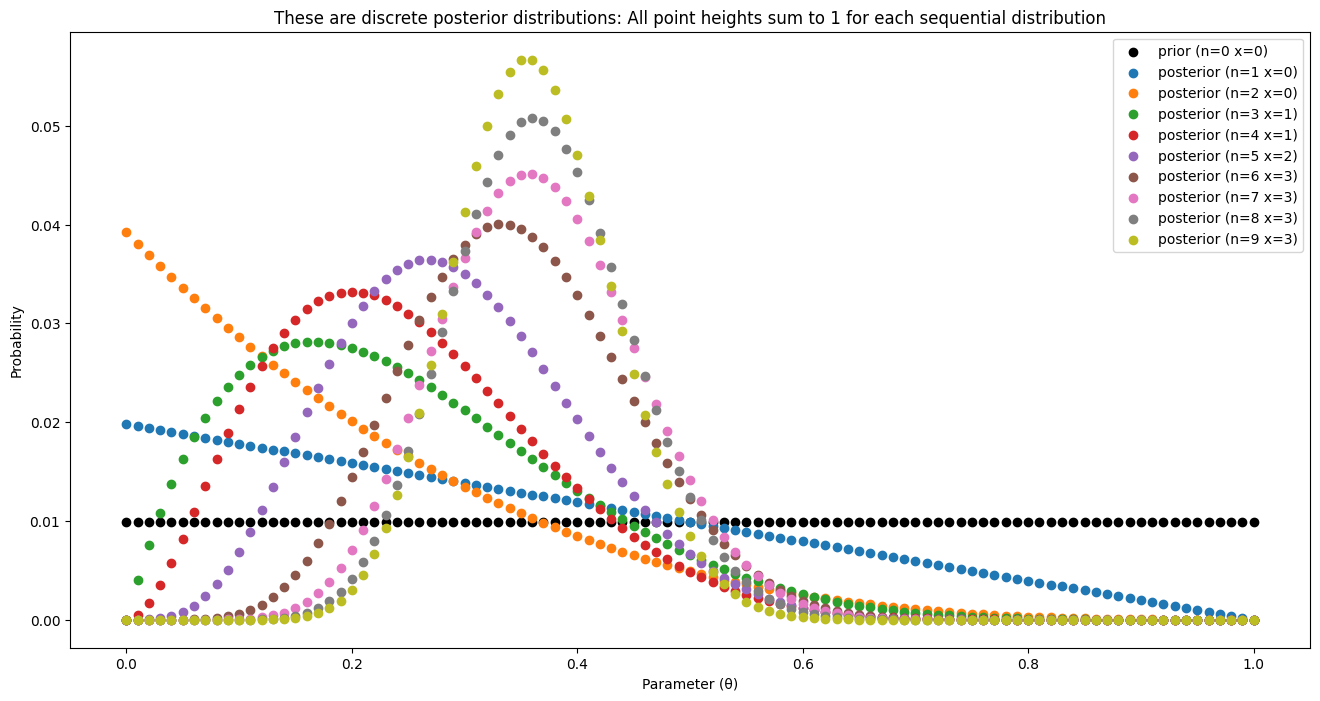

In [4]:
# Q1

import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

# Define parameter domain and prior
parameter_domain = np.linspace(0, 1, 101) 
prior = np.ones(101) / 101  # Uniform prior

# Observations
observations = [0, 0, 1, 0, 1, 1, 0, 0, 0]  # List of observations (1 = success, 0 = failure)
n, x = 0, 0  # Initialize counts for number of trials (n) and successes (x)

# Plot setup
plt.figure(figsize=(16, 8))
plt.scatter(parameter_domain, prior, label="prior (n=" + str(n) + " x=" + str(x) + ")", color="k")
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1  # Increment number of trials
    x += observation  # Increment number of successes

    # Update posterior using batch binomial likelihood
    likelihood = binom.pmf(x, n, parameter_domain)  # Binomial likelihood
    posterior = prior * likelihood  # Bayes' rule (proportional to likelihood * prior)
    posterior /= posterior.sum()  # Normalize to sum to 1
    prior = posterior  # Update prior to posterior for sequential updates

    # Plot the updated posterior
    plt.scatter(parameter_domain, posterior, label="posterior (n=" + str(n) + " x=" + str(x) + ")")

# Add legend and show plot
plt.legend()
plt.xlabel("Parameter (θ)")
plt.ylabel("Probability")
plt.show()


## Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

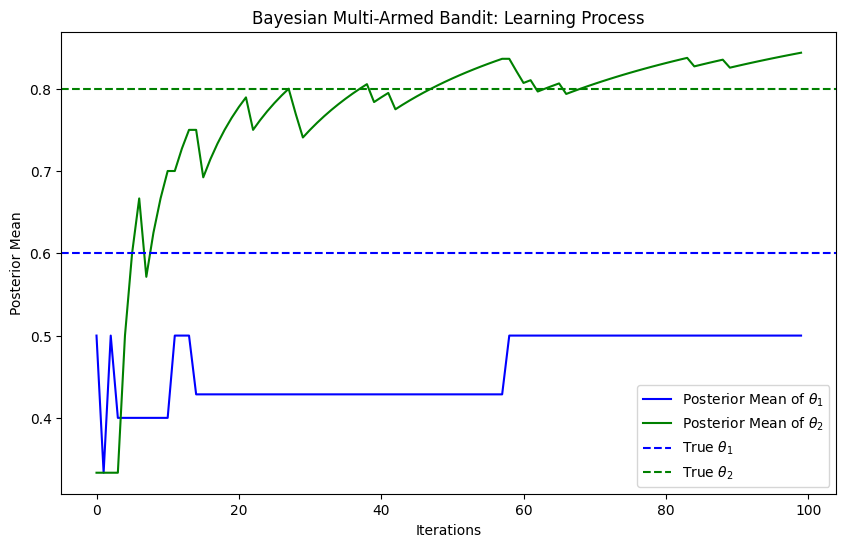

In [6]:
# A2

import numpy as np
import matplotlib.pyplot as plt

# True probabilities for each arm
theta_true_1 = 0.6
theta_true_2 = 0.8

# Initialize Beta prior parameters for arms (α and β)
alpha_1, beta_1 = 1, 1  # Prior for arm 1
alpha_2, beta_2 = 1, 1  # Prior for arm 2

# Number of iterations
m = 100

# Store posterior means for visualization
posterior_mean_1 = []
posterior_mean_2 = []

# Bayesian multi-armed bandit simulation
for t in range(m):
    # Sample from Beta distributions for arms
    theta_sample_1 = np.random.beta(alpha_1, beta_1)
    theta_sample_2 = np.random.beta(alpha_2, beta_2)

    # Choose the arm to pull (exploration vs exploitation)
    if theta_sample_1 > theta_sample_2:
        # Pull arm 1
        reward = np.random.binomial(1, theta_true_1)
        alpha_1 += reward
        beta_1 += 1 - reward
    else:
        # Pull arm 2
        reward = np.random.binomial(1, theta_true_2)
        alpha_2 += reward
        beta_2 += 1 - reward

    # Record posterior means
    posterior_mean_1.append(alpha_1 / (alpha_1 + beta_1))
    posterior_mean_2.append(alpha_2 / (alpha_2 + beta_2))

# Plot the learning process
plt.figure(figsize=(10, 6))
plt.plot(posterior_mean_1, label=r"Posterior Mean of $\theta_1$", color="blue")
plt.plot(posterior_mean_2, label=r"Posterior Mean of $\theta_2$", color="green")
plt.axhline(y=theta_true_1, color="blue", linestyle="--", label=r"True $\theta_1$")
plt.axhline(y=theta_true_2, color="green", linestyle="--", label=r"True $\theta_2$")
plt.xlabel("Iterations")
plt.ylabel("Posterior Mean")
plt.title("Bayesian Multi-Armed Bandit: Learning Process")
plt.legend()
plt.show()



## Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

## A3

1. **Generalization to Three Entities:**

**Analysis 1: Beta-Binomial Approach (Independent Analysis)**  
Each entity is analyzed independently using its own Beta prior and Binomial likelihood:  
$$
p(\theta_i | x_i, n_i) \propto \theta_i^{x_i + \alpha_i - 1} (1 - \theta_i)^{n_i - x_i + \beta_i - 1}.
$$
The arm (entity) with the highest sampled value from its Beta posterior is selected.

**Analysis 2: Dirichlet-Multinomial Approach (Joint Analysis)**  
The joint posterior for the three entities is:
$$
p(\theta_1, \theta_2, \theta_3 | x_1, x_2, x_3, n) \propto \prod_{i=1}^3 \theta_i^{x_i + \alpha_i - 1}, \quad \text{where } \sum_{i=1}^3 \theta_i = 1.
$$
The Dirichlet prior models dependencies between entities, allowing for shared structures.

2. **Advantages and Disadvantages**

- **Beta-Binomial**:
  - **Advantages**: Simplicity, independence, and ease of computation.
  - **Disadvantages**: Ignores correlations between entities.

- **Dirichlet-Multinomial**:
  - **Advantages**: Captures relationships and efficiently uses data for sparse cases.
  - **Disadvantages**: Computational complexity and potential overfitting risks.

3. **Real-World A/B Testing Context**

- **Beta-Binomial Example**:  
  Testing three unrelated ad creatives: *Ad A*, *Ad B*, and *Ad C*.  
  Performance of one ad does not provide information about others.

- **Dirichlet-Multinomial Example**:  
  Testing three color schemes for the same webpage: *Color Scheme A*, *Color Scheme B*, and *Color Scheme C*.  
  User behavior may overlap across schemes.

4. **Exploration-Exploitation Tradeoff**

The Bayesian multi-armed bandit balances:
- **Exploration**: Testing lesser-known entities to gather more data.
- **Exploitation**: Selecting entities with higher posterior means for better immediate results.
